In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from scipy import stats
import sympy as sp

In [2]:
# bonferroni

def f(n):
    return 3 ** n

def sigma(func, frm, to):
    result = 0;
    for i in range(frm, to+1):
        result += func(i)
    print(result)

sigma(f, 1, 6) #22

1092


# Numerical Experiment

## Type I Error Rate

## iid

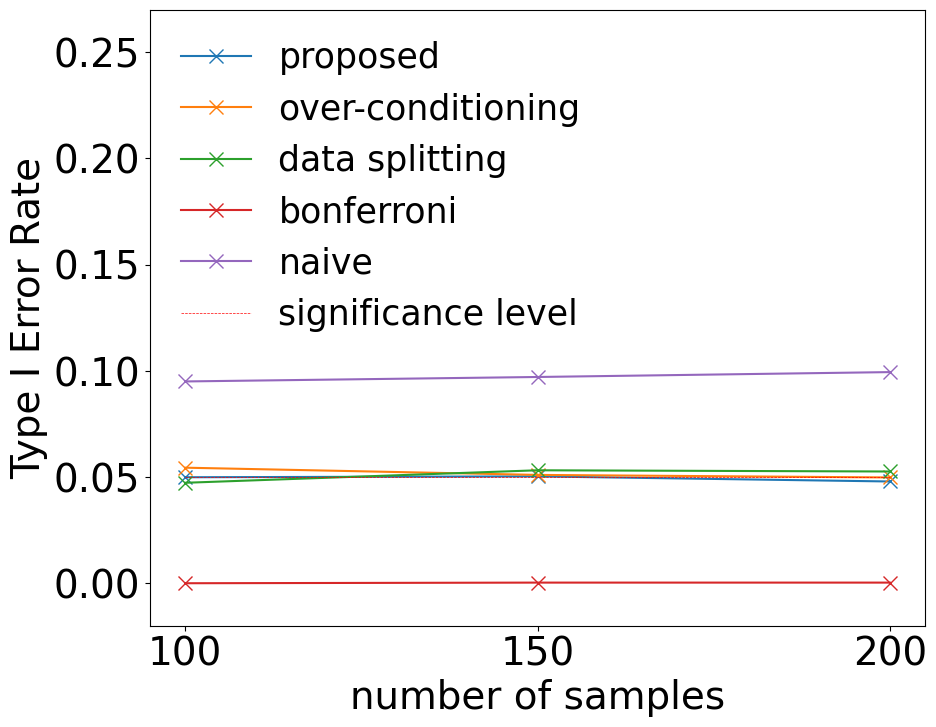

In [22]:
# Initialize lists for FPR and time
methods = ['naive', 'bonferroni', 'DS', 'oc', 'parametric']
fpr_dict_iid = {method: [] for method in methods}
time_dict_iid = {method: [] for method in methods}

# Parameters
d_size = [4]
n_size = [100, 150, 200]

# Function to process the results
def process_results(file_path, correction_factor=1.0):
    with open(file_path, 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result[0] for result in results])
    time_list = np.array([result[1] for result in results])
    return np.mean(p_list < (0.05 / correction_factor)), np.mean(time_list)

# Loop over the sample and dimension sizes
for n in n_size:
    for d in d_size:
        # Process naive
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_iid_naive.pkl')
        fpr_dict_iid['naive'].append(fpr)
        time_dict_iid['naive'].append(time)

        # Process bonferroni
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_iid_naive.pkl', correction_factor=1092)
        fpr_dict_iid['bonferroni'].append(fpr)
        time_dict_iid['bonferroni'].append(time)

        # Process DS
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_iid_DS.pkl')
        fpr_dict_iid['DS'].append(fpr)
        time_dict_iid['DS'].append(time)

        # Process oc
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_iid_oc.pkl')
        fpr_dict_iid['oc'].append(fpr)
        time_dict_iid['oc'].append(time)

        # Process parametric
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_iid_parametric.pkl')
        fpr_dict_iid['parametric'].append(fpr)
        time_dict_iid['parametric'].append(time)

# Convert to arrays
for method in methods:
    fpr_dict_iid[method] = np.array(fpr_dict_iid[method])

# Plotting
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(n_size, fpr_dict_iid['parametric'], label='proposed', marker="x", ms=10)
plt.plot(n_size, fpr_dict_iid['oc'], label='over-conditioning', marker="x", ms=10)
plt.plot(n_size, fpr_dict_iid['DS'], label='data splitting', marker="x", ms=10)
plt.plot(n_size, fpr_dict_iid['bonferroni'], label='bonferroni', marker="x", ms=10)
plt.plot(n_size, fpr_dict_iid['naive'], label='naive', marker="x", ms=10)

plt.plot(n_size, 0.05 * np.ones(len(n_size)), lw=0.5, linestyle='--', color='red', label='significance level')
plt.yticks(np.arange(0, 0.30, step=0.05))
plt.ylim(-0.02, 0.27)
plt.xlabel('number of samples', fontsize=28)
plt.ylabel('Type I Error Rate', fontsize=28)
plt.xticks(n_size)
plt.tick_params(labelsize=28)
plt.legend(frameon=False, fontsize=25, loc='upper left')

plt.show()


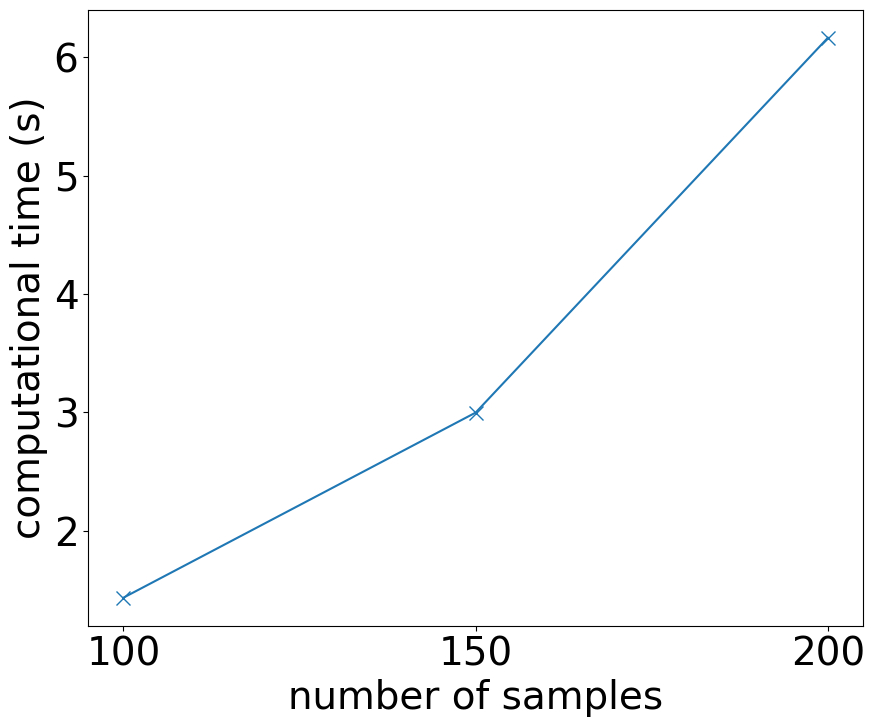

In [23]:
# Plotting Time
plt.figure(figsize=(10, 8))
plt.plot(n_size, time_dict_iid['parametric'], label='proposed', marker="x", ms=10)
plt.xlabel('number of samples', fontsize=28)
plt.ylabel('computational time (s)', fontsize=28)
plt.xticks(n_size)
plt.tick_params(labelsize=28)

plt.show()

## corr

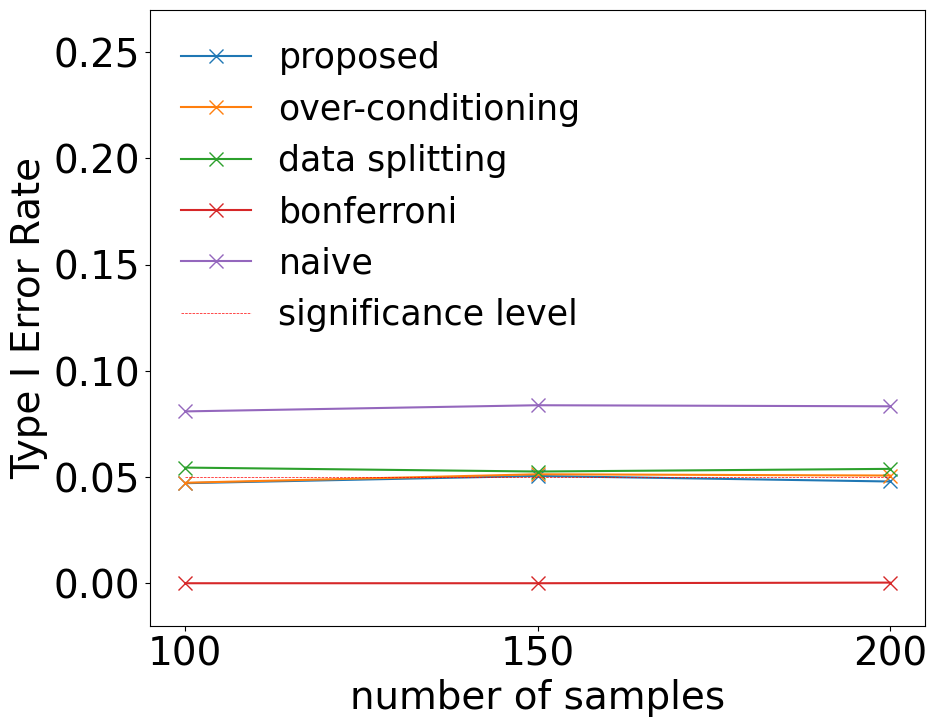

In [25]:
# Initialize lists for FPR and time
methods = ['naive', 'bonferroni', 'DS', 'oc', 'parametric']
fpr_dict_corr = {method: [] for method in methods}
time_dict_corr = {method: [] for method in methods}

# Parameters
d_size = [4]
n_size = [100, 150, 200]

# Loop over the sample and dimension sizes
for n in n_size:
    for d in d_size:
        # Process naive
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_corr_naive.pkl')
        fpr_dict_corr['naive'].append(fpr)
        time_dict_corr['naive'].append(time)

        # Process bonferroni
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_corr_naive.pkl', correction_factor=1092)
        fpr_dict_corr['bonferroni'].append(fpr)
        time_dict_corr['bonferroni'].append(time)

        # Process DS
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_corr_DS.pkl')
        fpr_dict_corr['DS'].append(fpr)
        time_dict_corr['DS'].append(time)

        # Process oc
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_corr_oc.pkl')
        fpr_dict_corr['oc'].append(fpr)
        time_dict_corr['oc'].append(time)

        # Process parametric
        fpr, time = process_results(f'fpr/n_{n}_d_{d}_corr_parametric.pkl')
        fpr_dict_corr['parametric'].append(fpr)
        time_dict_corr['parametric'].append(time)

# Convert to arrays
for method in methods:
    fpr_dict_corr[method] = np.array(fpr_dict_corr[method])

# Plotting
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(n_size, fpr_dict_corr['parametric'], label='proposed', marker="x", ms=10)
plt.plot(n_size, fpr_dict_corr['oc'], label='over-conditioning', marker="x", ms=10)
plt.plot(n_size, fpr_dict_corr['DS'], label='data splitting', marker="x", ms=10)
plt.plot(n_size, fpr_dict_corr['bonferroni'], label='bonferroni', marker="x", ms=10)
plt.plot(n_size, fpr_dict_corr['naive'], label='naive', marker="x", ms=10)

plt.plot(n_size, 0.05 * np.ones(len(n_size)), lw=0.5, linestyle='--', color='red', label='significance level')
plt.yticks(np.arange(0, 0.30, step=0.05))
plt.ylim(-0.02, 0.27)
plt.xlabel('number of samples', fontsize=28)
plt.ylabel('Type I Error Rate', fontsize=28)
plt.xticks(n_size)
plt.tick_params(labelsize=28)
plt.legend(frameon=False, fontsize=25, loc='upper left')

plt.show()


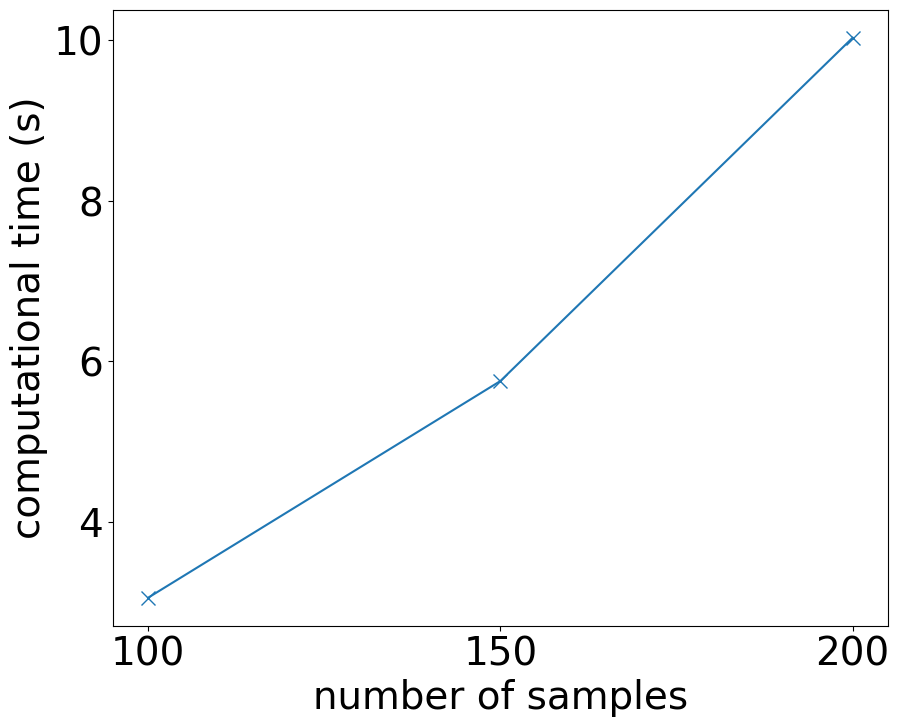

In [26]:
# Plotting Time
plt.figure(figsize=(10, 8))
plt.plot(n_size, time_dict_corr['parametric'], label='proposed', marker="x", ms=10)
plt.xlabel('number of samples', fontsize=28)
plt.ylabel('computational time (s)', fontsize=28)
plt.xticks(n_size)
plt.tick_params(labelsize=28)

plt.show()

## Power

## iid

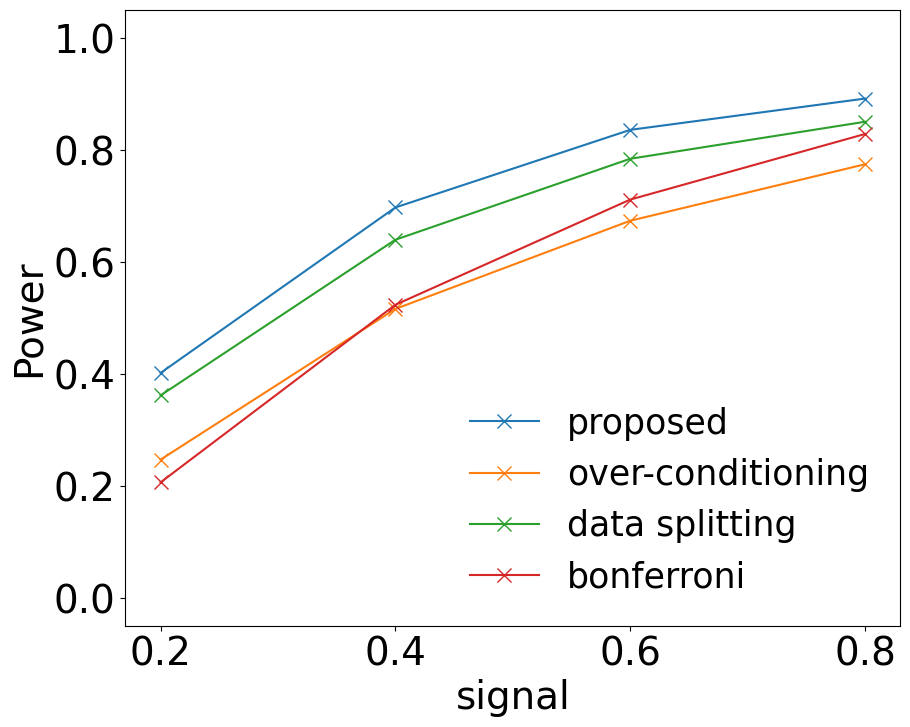

In [37]:
# Initialize lists for FPR and time
methods = ['naive', 'bonferroni', 'DS', 'oc', 'parametric']
tpr_dict_iid = {method: [] for method in methods}
time_dict_iid = {method: [] for method in methods}

# Parameters
signals = [0.2, 0.4, 0.6, 0.8]

# Function to process the results
def process_results(file_path, correction_factor=1.0):
    with open(file_path, 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result[0] for result in results])
    time_list = np.array([result[1] for result in results])
    return np.mean(p_list < (0.05 / correction_factor)), np.mean(time_list)

# Loop over the sample and dimension sizes
for signal in signals:

    # Process bonferroni
    tpr, time = process_results(f'tpr/signal_{signal}_iid_naive.pkl', correction_factor=1092)
    tpr_dict_iid['bonferroni'].append(tpr)
    time_dict_iid['bonferroni'].append(time)

    # Process DS
    tpr, time = process_results(f'tpr/signal_{signal}_iid_DS.pkl')
    tpr_dict_iid['DS'].append(tpr)
    time_dict_iid['DS'].append(time)

    # Process oc
    tpr, time = process_results(f'tpr/signal_{signal}_iid_oc.pkl')
    tpr_dict_iid['oc'].append(tpr)
    time_dict_iid['oc'].append(time)

    # Process parametric
    tpr, time = process_results(f'tpr/signal_{signal}_iid_parametric.pkl')
    tpr_dict_iid['parametric'].append(tpr)
    time_dict_iid['parametric'].append(time)

# Convert to arrays
for method in methods:
    tpr_dict_iid[method] = np.array(tpr_dict_iid[method])

# Plotting
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(signals, tpr_dict_iid['parametric'], label='proposed', marker="x", ms=10)
plt.plot(signals, tpr_dict_iid['oc'], label='over-conditioning', marker="x", ms=10)
plt.plot(signals, tpr_dict_iid['DS'], label='data splitting', marker="x", ms=10)
plt.plot(signals, tpr_dict_iid['bonferroni'], label='bonferroni', marker="x", ms=10)

plt.yticks(np.arange(0, 1.2, step=0.2))
plt.ylim(-0.05, 1.05)
plt.xlabel('signal', fontsize=28)
plt.ylabel('Power', fontsize=28)
plt.xticks(signals)
plt.tick_params(labelsize=28)
plt.legend(frameon=False, fontsize=25, loc='lower right')

plt.show()


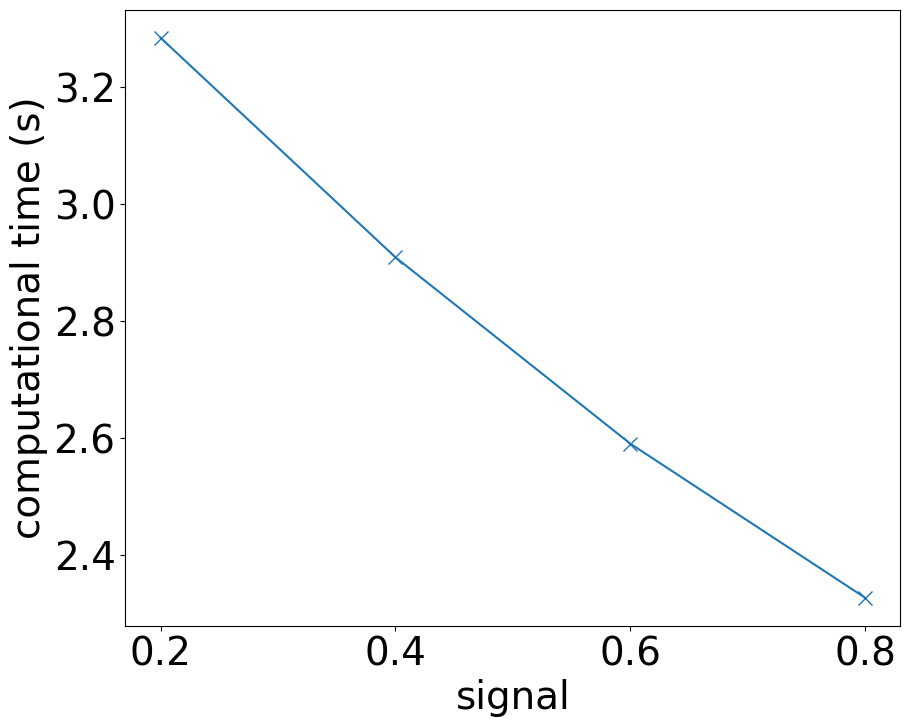

In [29]:
# Plotting Time
plt.figure(figsize=(10, 8))
plt.plot(signals, time_dict_iid['parametric'], label='proposed', marker="x", ms=10)
plt.xlabel('signal', fontsize=28)
plt.ylabel('computational time (s)', fontsize=28)
plt.xticks(signals)
plt.tick_params(labelsize=28)

plt.show()

## corr

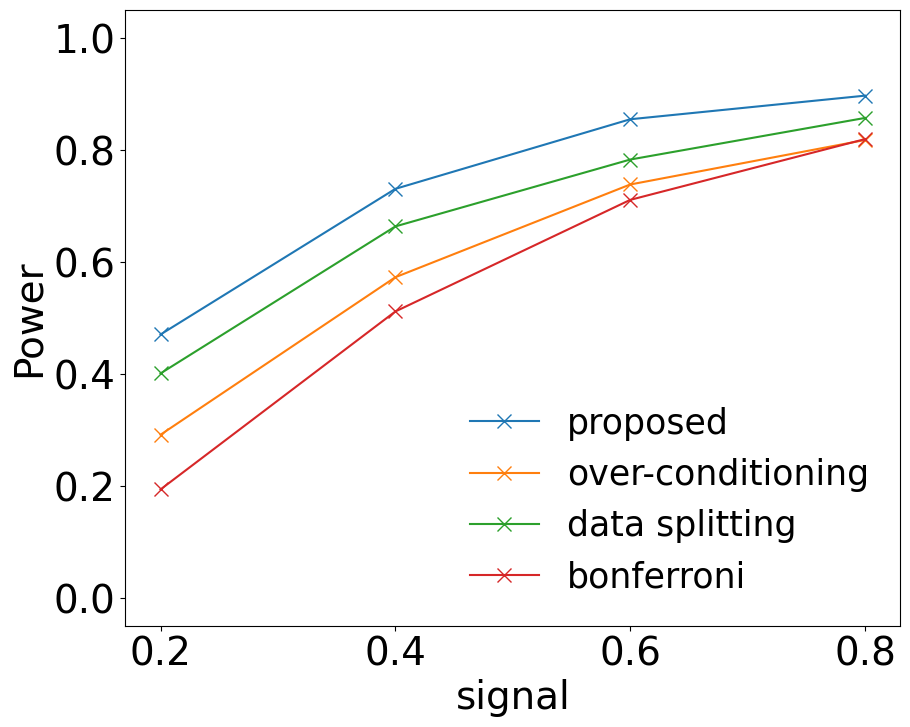

In [31]:
# Initialize lists for FPR and time
methods = ['naive', 'bonferroni', 'DS', 'oc', 'parametric']
tpr_dict_corr = {method: [] for method in methods}
time_dict_corr = {method: [] for method in methods}

# Parameters
signals = [0.2, 0.4, 0.6, 0.8]

# Function to process the results
def process_results(file_path, correction_factor=1.0):
    with open(file_path, 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result[0] for result in results])
    time_list = np.array([result[1] for result in results])
    return np.mean(p_list < (0.05 / correction_factor)), np.mean(time_list)

# Loop over the sample and dimension sizes
for signal in signals:

    # Process bonferroni
    tpr, time = process_results(f'tpr/signal_{signal}_corr_naive.pkl', correction_factor=1092)
    tpr_dict_corr['bonferroni'].append(tpr)
    time_dict_corr['bonferroni'].append(time)

    # Process DS
    tpr, time = process_results(f'tpr/signal_{signal}_corr_DS.pkl')
    tpr_dict_corr['DS'].append(tpr)
    time_dict_corr['DS'].append(time)

    # Process oc
    tpr, time = process_results(f'tpr/signal_{signal}_corr_oc.pkl')
    tpr_dict_corr['oc'].append(tpr)
    time_dict_corr['oc'].append(time)

    # Process parametric
    tpr, time = process_results(f'tpr/signal_{signal}_corr_parametric.pkl')
    tpr_dict_corr['parametric'].append(tpr)
    time_dict_corr['parametric'].append(time)

# Convert to arrays
for method in methods:
    tpr_dict_corr[method] = np.array(tpr_dict_corr[method])

# Plotting
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(signals, tpr_dict_corr['parametric'], label='proposed', marker="x", ms=10)
plt.plot(signals, tpr_dict_corr['oc'], label='over-conditioning', marker="x", ms=10)
plt.plot(signals, tpr_dict_corr['DS'], label='data splitting', marker="x", ms=10)
plt.plot(signals, tpr_dict_corr['bonferroni'], label='bonferroni', marker="x", ms=10)

plt.yticks(np.arange(0, 1.2, step=0.2))
plt.ylim(-0.05, 1.05)
plt.xlabel('signal', fontsize=28)
plt.ylabel('Power', fontsize=28)
plt.xticks(signals)
plt.tick_params(labelsize=28)
plt.legend(frameon=False, fontsize=25, loc='lower right')

plt.show()


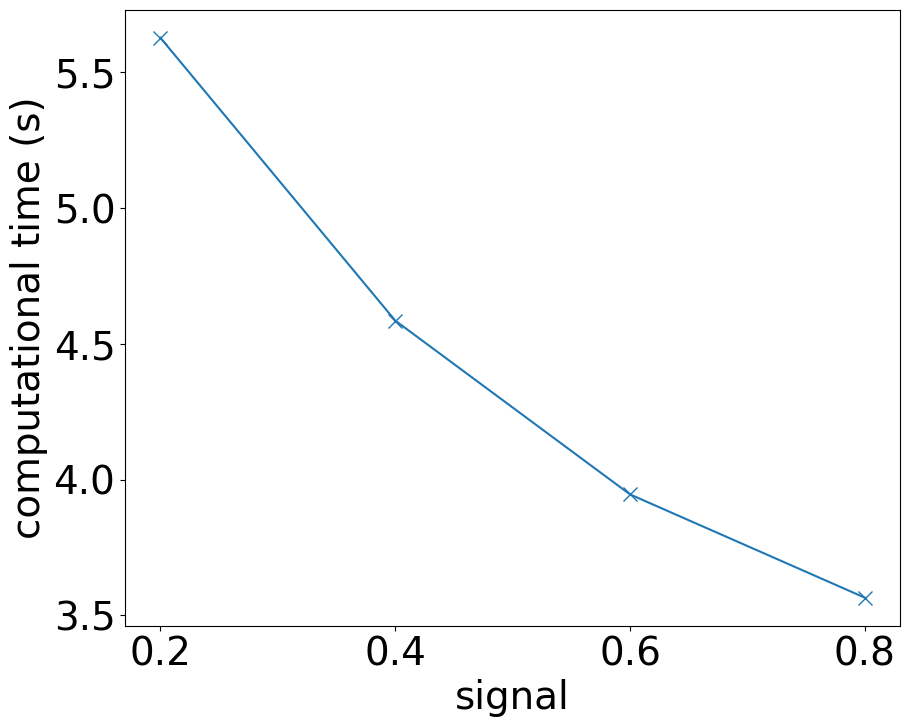

In [33]:
# Plotting Time
plt.figure(figsize=(10, 8))
plt.plot(signals, time_dict_corr['parametric'], label='proposed', marker="x", ms=10)
plt.xlabel('signal', fontsize=28)
plt.ylabel('computational time (s)', fontsize=28)
plt.xticks(signals)
plt.tick_params(labelsize=28)

plt.show()

## Robust Experiment

## estimated variance

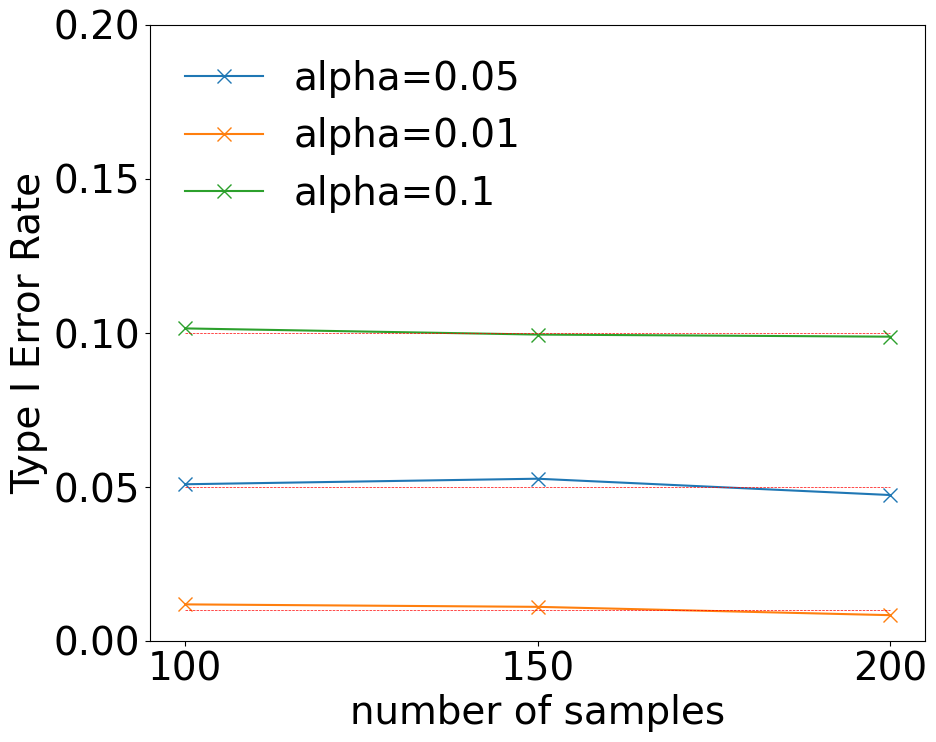

In [36]:
alpha_levels = [0.05, 0.01, 0.10]
pattern_dict = {f'alpha={alpha}': [] for alpha in alpha_levels}

n_size = [100, 150, 200]

def process_robust(file_path, alpha_levels):
    with open(file_path, 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result[0] for result in results])
    patterns = [np.mean(p_list < alpha) for alpha in alpha_levels]
    return patterns

for n in n_size:
    for d in d_size:

        file_path = f'robust/n_{n}_d_{d}_estimated.pkl'
        patterns = process_robust(file_path, alpha_levels)

        for i, alpha in enumerate(alpha_levels):
            pattern_dict[f'alpha={alpha}'].append(patterns[i])

# Convert to arrays
left = np.array(n_size)

# Plotting Type I Error Rates for different alpha levels
plt.rcParams["figure.figsize"] = (10, 8)

for alpha in alpha_levels:
    plt.plot(left, pattern_dict[f'alpha={alpha}'], label=f'alpha={alpha}', marker="x", ms=10)

# Plot significance level reference lines
for alpha in alpha_levels:
    plt.plot(n_size, alpha * np.ones(len(n_size)), lw=0.5, linestyle='--', color='red')

plt.yticks(np.arange(0, 0.25, step=0.05))
plt.xlabel('number of samples', fontsize=28)
plt.ylabel('Type I Error Rate', fontsize=28)
plt.xticks(n_size)
plt.tick_params(labelsize=28)
plt.legend(frameon=False, fontsize=28, loc='upper left')
plt.show()


## non-gaussian noise

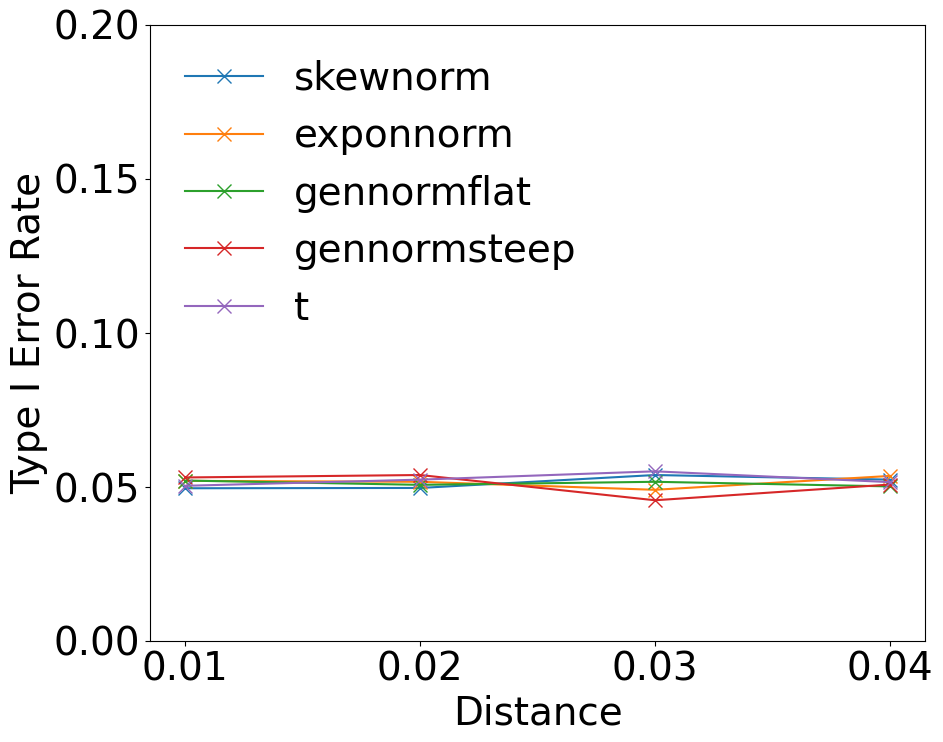

In [39]:
distance_list = [0.01, 0.02, 0.03, 0.04]
robust_type = ['skewnorm', 'exponnorm', 'gennormflat', 'gennormsteep', 't']
fpr_dict = {robust: [] for robust in robust_type}

for distance in distance_list:
    for robust in robust_type:
        with open(f'robust/type_{robust}_distance_{distance}.pkl', 'rb') as f:
            results = pickle.load(f)

        p_list = np.array([result[0] for result in results])
        fpr_dict[robust].append(np.mean(p_list < 0.05))

# Plotting
plt.rcParams["figure.figsize"] = (10, 8)

for robust in robust_type:
    plt.plot(distance_list, fpr_dict[robust], label=robust, marker='x', ms=10)

plt.yticks(np.arange(0, 0.25, step=0.05))
plt.xlabel('Distance', fontsize=28)
plt.ylabel('Type I Error Rate', fontsize=28)
plt.xticks(distance_list)
plt.tick_params(labelsize=28)
plt.legend(frameon=False, fontsize=28, loc='upper left')
plt.show()
